In [110]:
import pybedtools as pbt
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.style.use('fivethirtyeight')
def clean_axis(ax):
    ax.xaxis.set_tick_params(labelsize=9)
    ax.yaxis.set_tick_params(labelsize=9)
    for i in ['top', 'bottom', 'left', 'right']:
        ax.spines[i].set_visible(False)
    ax.grid(which='major', linestyle='--', alpha=0.5)
    return True

In [142]:
base_dir = '/home/parashar/scratch/quadruplexes/hg19'
chroms = ['chr' + str(x) for x in range(1,23)] + ['chrX', 'chrY']
for i in [5, 15, 25][::-1]:
    for j in [0, 5]:
        tot = 0
        num = 0
        for chrom in chroms: 
            fn = '%s/g3_%d_%d_%s_nov.bed' % (base_dir, i, j, chrom)
            with open(fn) as h:
                for l in h:
                    c = l.rstrip('\n').split('\t')
                    tot += int(c[2]) - int(c[1])
                    num += 1
        print (i, j, tot, num)        

25 0 95259462 1814347
25 5 1381727120 19984894
15 0 36911619 989528
15 5 778193162 15862161
5 0 5326617 246128
5 5 204804090 6731377


In [15]:
sum([int(x.rstrip('\n').split('\t')[1]) for x in 
    open('/home/parashar/scratch/hg19_resource/hg19.genome').readlines()
         if x.split('\t')[0] in chroms])

3095677412

In [143]:
1381727120/(3095677412*2)

0.22317039796264146

In [80]:
base_dir = '/home/parashar/scratch/quadcomb/data/null_dist_pg4s'
null_dist = {}
for bulge in ['0', '5']:
    null_dist[int(bulge)] = {}
    for loop in ['5', '10', '15', '25']:
        null_dist[int(bulge)][int(loop)] = {}
        for feat_len in ['50', '100', '500', '1000']:
            null_dist[int(bulge)][int(loop)][int(feat_len)] = []
            for chrom in chroms:                    
                fn = '%s/%s_%s_%s_10_%s' % ( base_dir, chrom, loop, bulge, feat_len)
                dist = [int(x.rstrip('\n')) for x in open(fn).readlines()]
                null_dist[int(bulge)][int(loop)][int(feat_len)].append(dist)
            null_dist[int(bulge)][int(loop)][int(feat_len)] = np.array(
                    null_dist[int(bulge)][int(loop)][int(feat_len)])

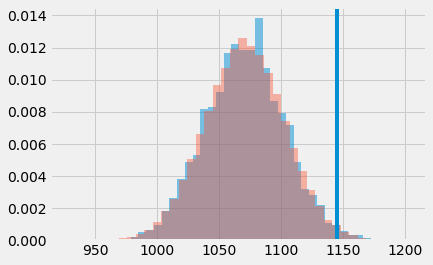

In [120]:
a = null_dist[0][5][500].sum(axis=0)
f = np.random.normal(loc=a.mean(), scale=a.std(), size=50000)
cutoff = norm.ppf(0.99, loc=f.mean(), scale=f.std())

plt.hist(a, bins=40, alpha=0.5, normed=True)
plt.hist(f, bins=40, alpha=0.4, normed=True)
plt.axvline(cutoff)
plt.show()

In [158]:
chrom_lens = {x.rstrip('\n').split('\t')[0]: int(x.rstrip('\n').split('\t')[1]) for x in
                  open('/home/parashar/scratch/hg19_resource/hg19.genome').readlines()}
features_per_mb = 10
num_regions = sum([int(chrom_lens[chrom]/1e6)*features_per_mb for chrom in chroms])

In [160]:
for bulge in [0, 5]:
    for loop in [5, 10, 15, 25]:
        for feat_len in [50, 100, 500, 1000]:
            a = null_dist[bulge][loop][feat_len].sum(axis=0)
            f = np.random.normal(loc=a.mean(), scale=a.std(), size=50000)
            p = norm.ppf(1-0.05, loc=f.mean(), scale=f.std())
            q = norm.ppf(1-0.05/num_regions, loc=f.mean(), scale=f.std()) 
            print (bulge, loop, feat_len, int(round(f.mean())),
                   int(round(p)), int(round(q)), 100*q/num_regions)

0 5 50 165 187 225 0.728974401748
0 5 100 274 302 352 1.13805838361
0 5 500 1071 1124 1220 3.94946590003
0 5 1000 1973 2044 2173 7.0337696613
0 10 50 442 476 539 1.74364596561
0 10 100 697 740 819 2.65091480899
0 10 500 2413 2490 2630 8.51543299881
0 10 1000 4163 4262 4443 14.3824001352
0 15 50 812 858 942 3.04803791866
0 15 100 1223 1279 1383 4.47570022948
0 15 500 3822 3916 4088 13.2342070256
0 15 1000 6295 6410 6622 21.4378588791
0 25 50 1725 1790 1911 6.18672843694
0 25 100 2420 2497 2639 8.54300330527
0 25 500 6486 6600 6810 22.0461279548
0 25 1000 9992 10125 10368 33.5637025855
5 5 50 4600 4703 4892 15.8364328288
5 5 100 6674 6790 7002 22.6684780495
5 5 500 15956 16099 16361 52.9654097736
5 5 1000 21191 21322 21562 69.8037424349
5 10 50 8761 8891 9128 29.5496898901
5 10 100 11762 11900 12152 39.3409308181
5 10 500 21939 22068 22304 72.204724652
5 10 1000 25796 25902 26094 84.4744151275
5 15 50 11955 12095 12352 39.9877554054
5 15 100 15142 15285 15548 50.3323334761
5 15 500 24455